# Churn                                                                                                        
### Exploratory Data Analysis in R

### _By: Ankur Patel_
---


### Introduction:

The churn dataset was used to predict the churn rate of the customers. It's the percentage of subscribers to a service who discontinue their subscriptions to the service within a given time period. This report will include analysis of this dataset of 21 variables, including the missing values, outliers, distribution of variables, and graphs. The outputs will include comments or descriptions, and the conclusion will have the overall observation.

In [10]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [7]:
df <- data.frame(read.csv("churn.txt"))
head(df)

State,Account.Length,Area.Code,Phone,Int.l.Plan,VMail.Plan,VMail.Message,Day.Mins,Day.Calls,Day.Charge,...,Eve.Calls,Eve.Charge,Night.Mins,Night.Calls,Night.Charge,Intl.Mins,Intl.Calls,Intl.Charge,CustServ.Calls,Churn.
KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.


In [8]:
str(df)

'data.frame':	3333 obs. of  21 variables:
 $ State         : Factor w/ 51 levels "AK","AL","AR",..: 17 36 32 36 37 2 20 25 19 50 ...
 $ Account.Length: int  128 107 137 84 75 118 121 147 117 141 ...
 $ Area.Code     : int  415 415 415 408 415 510 510 415 408 415 ...
 $ Phone         : Factor w/ 3333 levels "327-1058","327-1319",..: 1927 1576 1118 1708 111 2254 1048 81 292 118 ...
 $ Int.l.Plan    : Factor w/ 2 levels "no","yes": 1 1 1 2 2 2 1 2 1 2 ...
 $ VMail.Plan    : Factor w/ 2 levels "no","yes": 2 2 1 1 1 1 2 1 1 2 ...
 $ VMail.Message : int  25 26 0 0 0 0 24 0 0 37 ...
 $ Day.Mins      : num  265 162 243 299 167 ...
 $ Day.Calls     : int  110 123 114 71 113 98 88 79 97 84 ...
 $ Day.Charge    : num  45.1 27.5 41.4 50.9 28.3 ...
 $ Eve.Mins      : num  197.4 195.5 121.2 61.9 148.3 ...
 $ Eve.Calls     : int  99 103 110 88 122 101 108 94 80 111 ...
 $ Eve.Charge    : num  16.78 16.62 10.3 5.26 12.61 ...
 $ Night.Mins    : num  245 254 163 197 187 ...
 $ Night.Calls   : int  91 10

In [9]:
summary(df)

     State      Account.Length    Area.Code          Phone      Int.l.Plan
 WV     : 106   Min.   :  1.0   Min.   :408.0   327-1058:   1   no :3010  
 MN     :  84   1st Qu.: 74.0   1st Qu.:408.0   327-1319:   1   yes: 323  
 NY     :  83   Median :101.0   Median :415.0   327-3053:   1             
 AL     :  80   Mean   :101.1   Mean   :437.2   327-3587:   1             
 OH     :  78   3rd Qu.:127.0   3rd Qu.:510.0   327-3850:   1             
 OR     :  78   Max.   :243.0   Max.   :510.0   327-3954:   1             
 (Other):2824                                   (Other) :3327             
 VMail.Plan VMail.Message       Day.Mins       Day.Calls       Day.Charge   
 no :2411   Min.   : 0.000   Min.   :  0.0   Min.   :  0.0   Min.   : 0.00  
 yes: 922   1st Qu.: 0.000   1st Qu.:143.7   1st Qu.: 87.0   1st Qu.:24.43  
            Median : 0.000   Median :179.4   Median :101.0   Median :30.50  
            Mean   : 8.099   Mean   :179.8   Mean   :100.4   Mean   :30.56  
            3rd

After getting the dataset's structure and summary, we will analyze some selected variables.

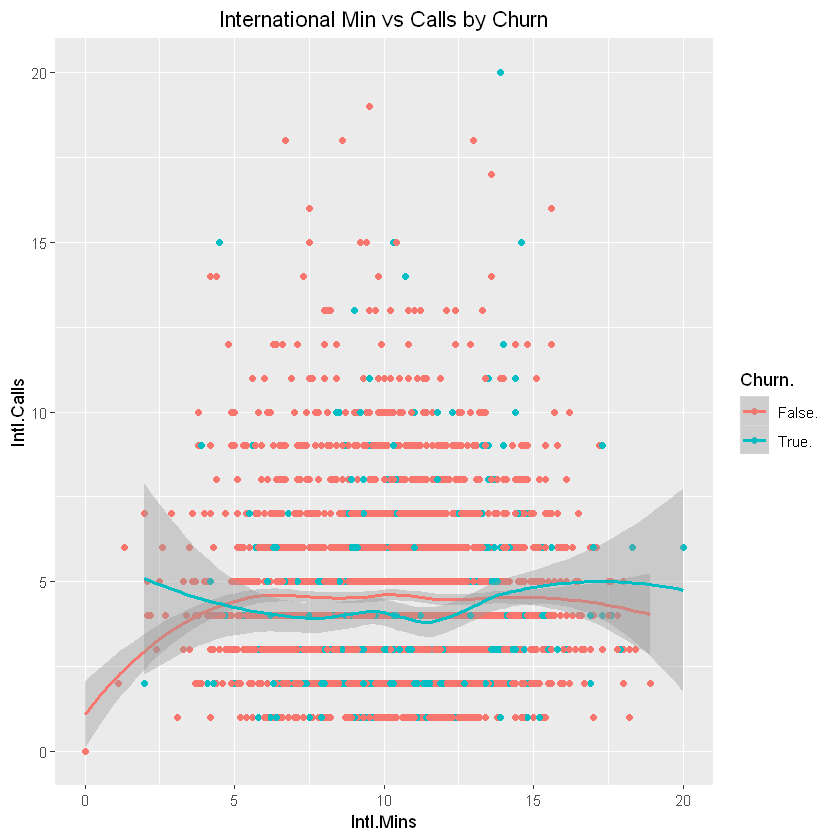

In [23]:
ggplot(df, aes(x=Intl.Mins, y=Intl.Calls, color=Churn.)) + 
    geom_point() + geom_smooth(method = "loess") + 
    ggtitle("International Min vs Calls by Churn") + 
    theme(plot.title = element_text(hjust = 0.5))

The international phone calls were mostly between 5 to 15 minutes, and that the phones made mostly 2 to 5 calls.

Warning message:
"Using size for a discrete variable is not advised."

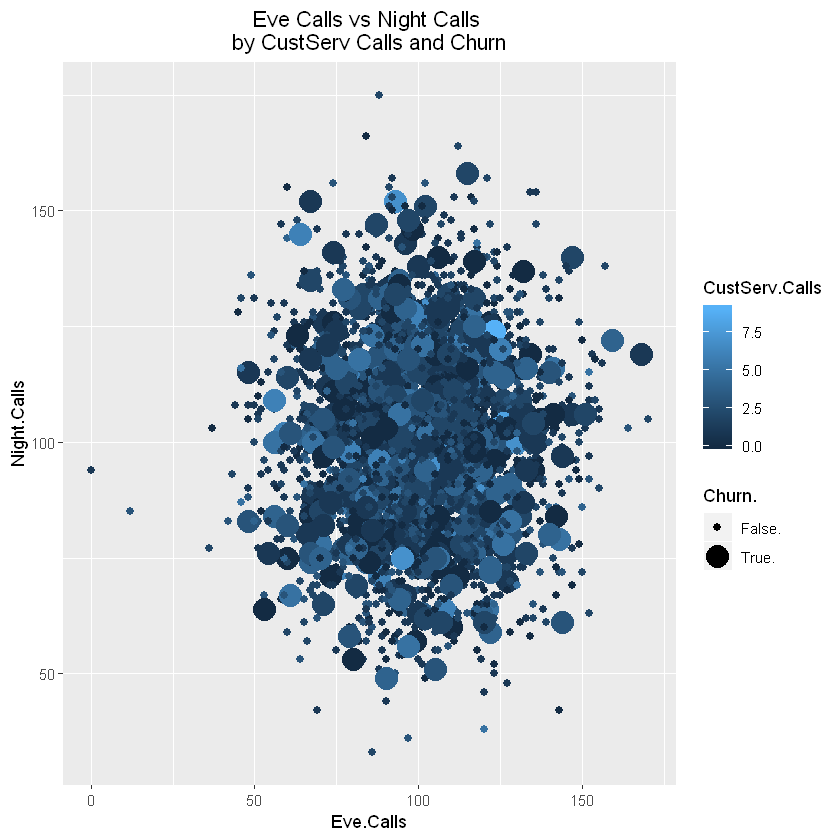

In [24]:
ggplot(df, aes(x=Eve.Calls, y=Night.Calls, color=CustServ.Calls, size=Churn.)) + geom_point() +
    ggtitle("Eve Calls vs Night Calls \nby CustServ Calls and Churn") + 
    theme(plot.title = element_text(hjust = 0.5))


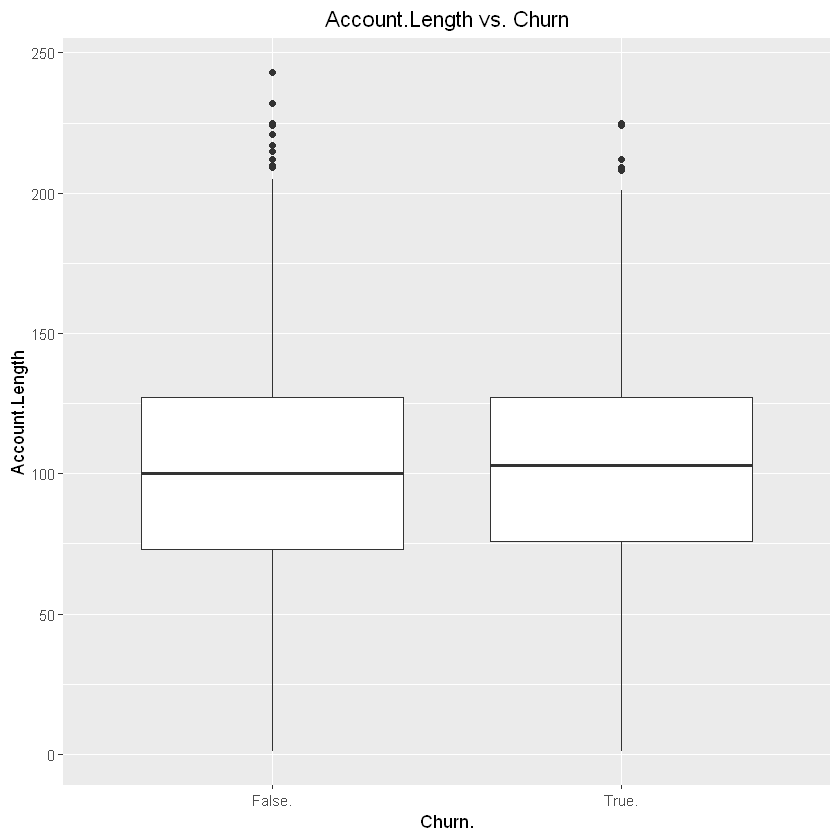

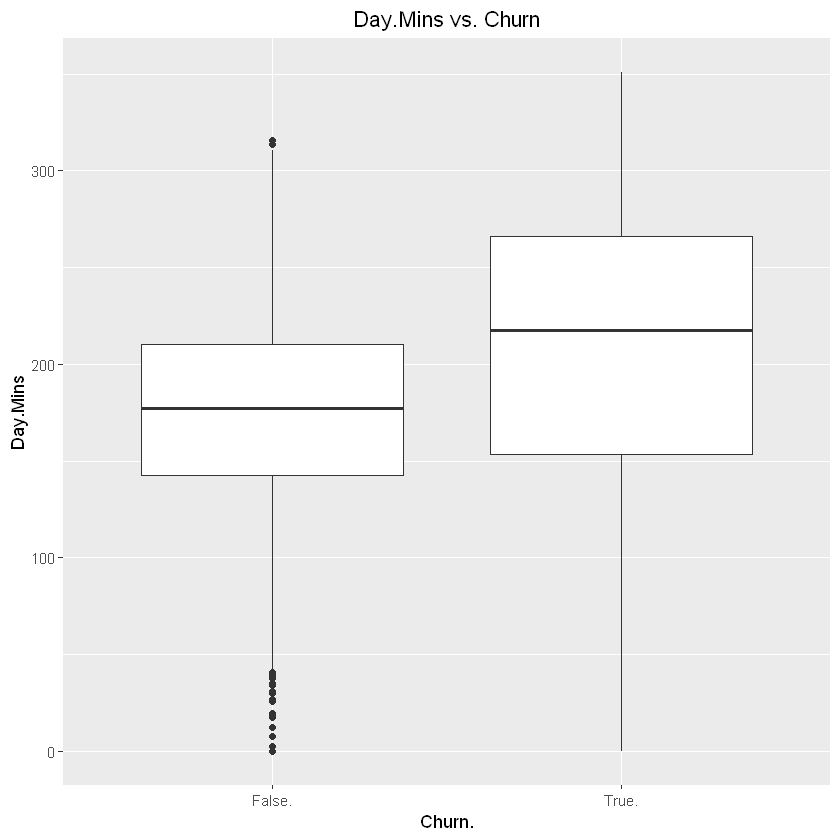

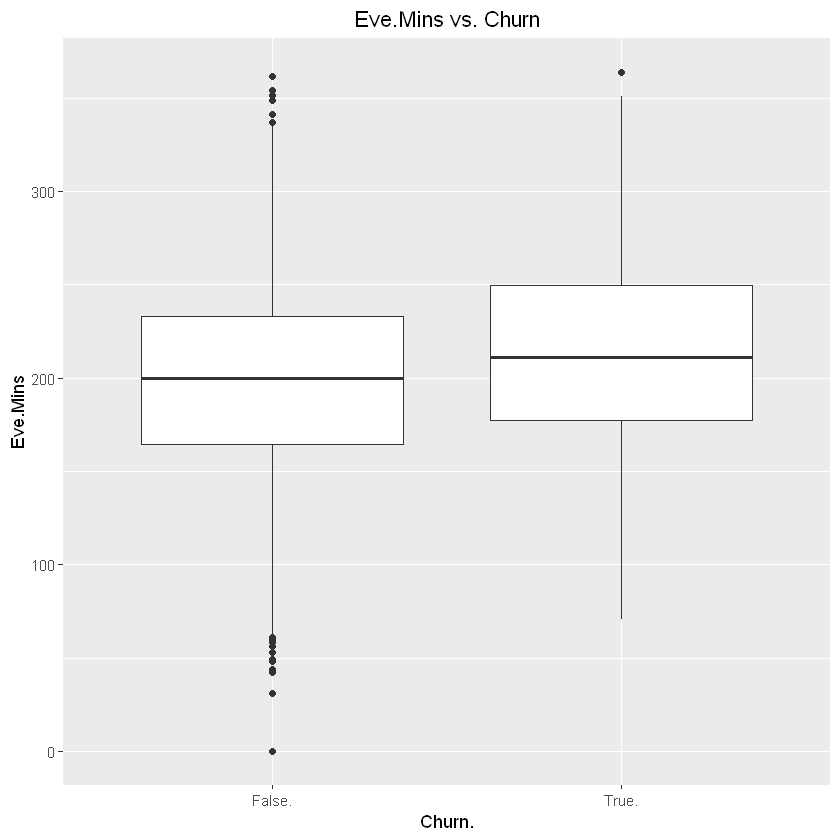

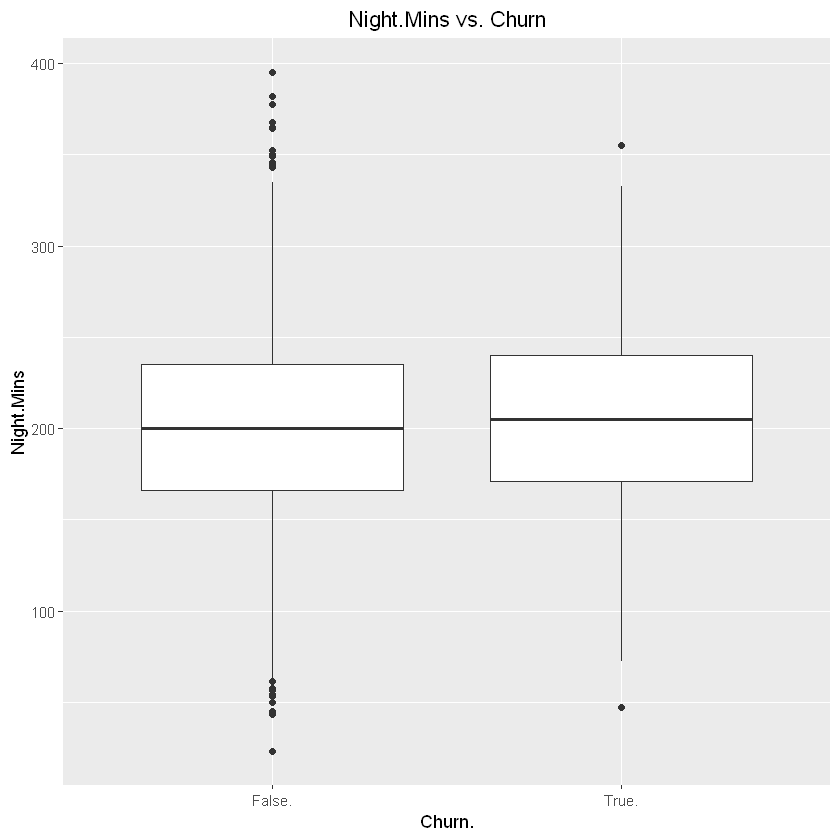

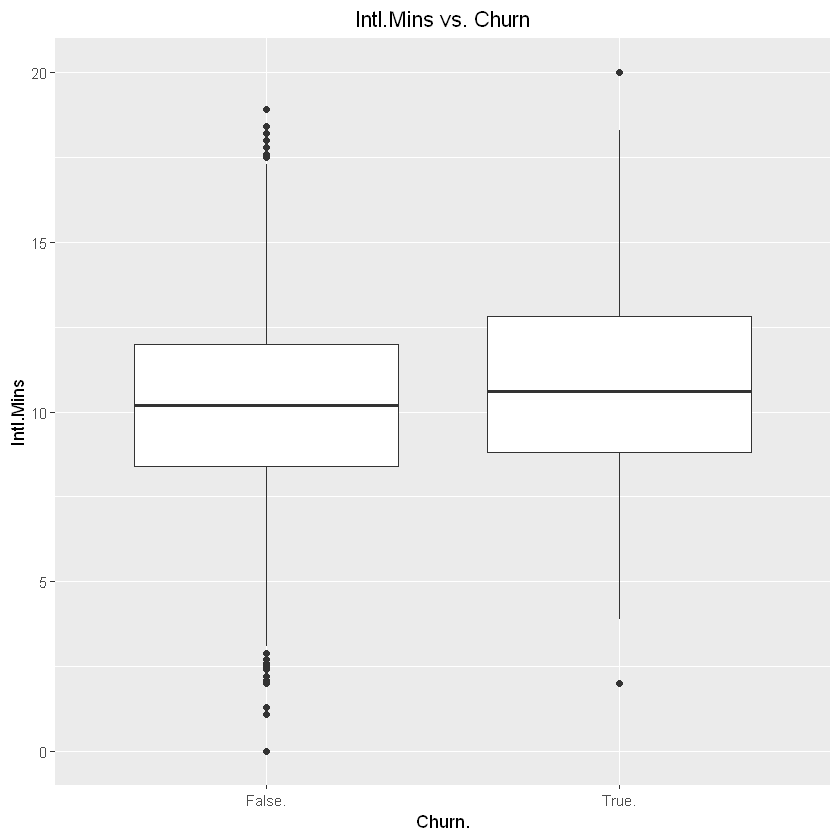

In [26]:
num <- df[,c("Account.Length","Day.Mins", "Eve.Mins", "Night.Mins", "Intl.Mins", "Churn.")]
for(i in names(num)[-6]){
    plot <- ggplot(num, aes_string("Churn.", y = i)) + geom_boxplot() + ggtitle(paste0(i, " vs. Churn")) + 
    theme(plot.title = element_text(hjust = 0.5))
    print(plot)
    }


The box plots show that the phones that churned genereally have more minutes. The box plots also show the outliers that are not in the IQR * 1.5 range.

### Conclusion:

A smaller analysis was performed here in R for the Churn dataset. It was seen that there were mostly 2 to 5 international phone calls of mostly between 5 to 15 minutes. The evening calls vs night calls graph showed that the outliers were of False condition of Churn. Lastly, the box plots were used to see the difference between Churn according to the minutes, and it showed more minutes for True.  

_Please refer to the Python notebook for a more detailed analysis._